In [355]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy
import random
import csv

In [326]:
# choose means
x = np.arange(-30,30,10)
y = np.arange(-30,30,10)

In [350]:
def gauss_2d(x,y,num_points,cov):
    points_a = []
    points_b = []
    cluster_id = None
    for i in x:
        for j in y:
            cluster_id = i*j
            mean = [i, j]
            a,b = np.random.multivariate_normal(mean,cov,num_points).T
            class_ = np.random.random()
            for point in zip(a,b):
                dist_from_center = np.sqrt((point[0] - i)**2 + (point[1] - j)**2)
                if class_ < 0.5:
                    if dist_from_center <  2:
                        points_a.append([point[0],point[1],cluster_id])
                    else:
                        points_b.append([point[0],point[1],cluster_id])
                        
                else:
                    if dist_from_center <  2:
                        points_b.append([point[0],point[1],cluster_id])
                    else:
                        points_a.append([point[0],point[1],cluster_id])
    return np.array(points_a), np.array(points_b)

In [351]:
cov = [[2,0],[0,2]]
points_a, points_b = gauss_2d(x,y,500,cov)

In [352]:
print(points_a.shape, points_b.shape)

(10140, 3) (7860, 3)


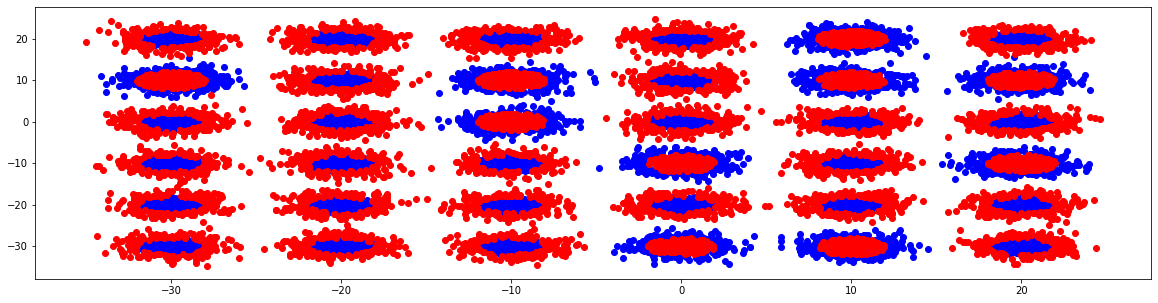

In [353]:
colors= ["blue", "red"]
plt.figure(figsize=(20,5))
plt.scatter(points_a[:,0], points_a[:,1], color = "blue")
plt.scatter(points_b[:,0], points_b[:,1], color = "red")
plt.show()

In [354]:
points_dict = []
for point in points_a:
    new_value = {"x_1":point[0], "x_2": point[1], "y": 0, "cluster":point[2]}
    points_dict.append(new_value)

keys = points_dict[0].keys()


10140


In [277]:
def unif_2d(x,y):
    points_a = []
    points_b = []
    for i in x:
        for j in y:
            xy_min = [-2, -2]
            xy_max = [2, 2]
            data = np.random.uniform(low=xy_min, high=xy_max, size=(500,2))
            for point in data:
                shifted_point = [point[0]+i, point[1]+j]
                dist_from_center = np.sqrt((shifted_point[0] - i)**2 + (shifted_point[1] - j)**2)
                if dist_from_center < 1:
                    points_a.append([shifted_point[0],shifted_point[1]])
                else:
                    points_b.append([shifted_point[0],shifted_point[1]])
    return np.array(points_a), np.array(points_b)

In [278]:
points_a, points_b = unif_2d(x,y)

In [279]:
print(points_a.shape, points_b.shape)

(3660, 2) (14340, 2)


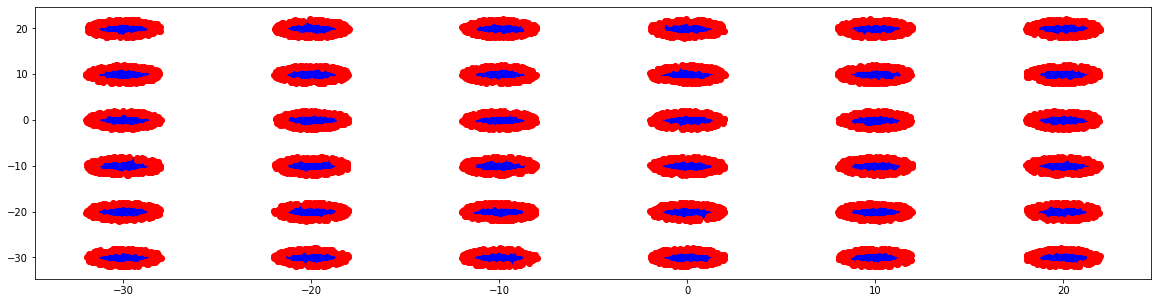

In [306]:
colors= ["blue", "red"]
plt.figure(figsize=(20,5))
plt.scatter(points_a[:,0], points_a[:,1], color = "blue")
plt.scatter(points_b[:,0], points_b[:,1], color = "red")
plt.show()

In [347]:
def unif_2d_spherical(x,y):
    points_a = []
    points_b = []
    for i in x:
        for j in y:
            xy_min = [-2, -2]
            xy_max = [2, 2]
            data = np.random.uniform(low=xy_min, high=xy_max, size=(500,2))
            class_ = np.random.random()
            for point in data:
                shifted_point = [point[0]+i, point[1]+j]
                dist_from_center = np.sqrt((shifted_point[0] - i)**2 + (shifted_point[1] - j)**2)
                if class_ < 0.5:
                    if dist_from_center < 2:
                        if dist_from_center < 1.5:
                            points_a.append([shifted_point[0],shifted_point[1]])
                        else:
                            points_b.append([shifted_point[0],shifted_point[1]])
                else:
                    if dist_from_center < 2:
                        if dist_from_center < 1.5:
                            points_b.append([shifted_point[0],shifted_point[1]])
                        else:
                            points_a.append([shifted_point[0],shifted_point[1]])
                
    return np.array(points_a), np.array(points_b)

(7256, 2) (6821, 2)


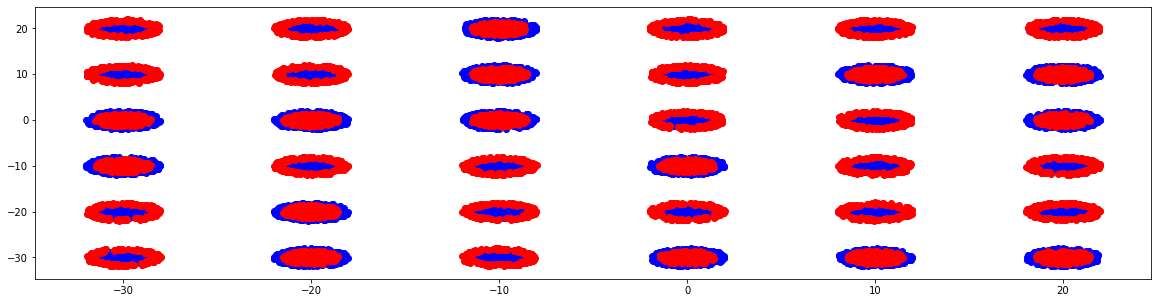

In [348]:
points_a, points_b = unif_2d_spherical(x,y)
print(points_a.shape,points_b.shape)

plt.figure(figsize=(20,5))
plt.scatter(points_a[:,0], points_a[:,1], color = "blue")
plt.scatter(points_b[:,0], points_b[:,1], color = "red")
plt.show()